In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv('/Users/vladpivovarov/Documents/Python/Udemy-2/5.Data/P39-Minimizing-Churn-Data/churn_data.csv')

In [4]:
#1.Check Data
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [5]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [6]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
user                       27000 non-null int64
churn                      27000 non-null int64
age                        26996 non-null float64
housing                    27000 non-null object
credit_score               18969 non-null float64
deposits                   27000 non-null int64
withdrawal                 27000 non-null int64
purchases_partners         27000 non-null int64
purchases                  27000 non-null int64
cc_taken                   27000 non-null int64
cc_recommended             27000 non-null int64
cc_disliked                27000 non-null int64
cc_liked                   27000 non-null int64
cc_application_begin       27000 non-null int64
app_downloaded             27000 non-null int64
web_user                   27000 non-null int64
app_web_user               27000 non-null int64
ios_user                   27000 non-null int64
android_user          

In [8]:
#2. Remove NaN

In [9]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [10]:
dataset = dataset[pd.notnull(dataset['age'])]
dataset = dataset.drop(columns = ['credit_score','rewards_earned'])

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26996 entries, 0 to 26999
Data columns (total 29 columns):
user                       26996 non-null int64
churn                      26996 non-null int64
age                        26996 non-null float64
housing                    26996 non-null object
deposits                   26996 non-null int64
withdrawal                 26996 non-null int64
purchases_partners         26996 non-null int64
purchases                  26996 non-null int64
cc_taken                   26996 non-null int64
cc_recommended             26996 non-null int64
cc_disliked                26996 non-null int64
cc_liked                   26996 non-null int64
cc_application_begin       26996 non-null int64
app_downloaded             26996 non-null int64
web_user                   26996 non-null int64
app_web_user               26996 non-null int64
ios_user                   26996 non-null int64
android_user               26996 non-null int64
registered_phones       

In [12]:
#Features Histograms
dataset2 = dataset.drop(columns = ['user','churn'])

In [ ]:
# # Needed older version of Sns
# fig = plt.figure(figsize=(15,12))
# plt.suptitle('Histogram of numerical columns', fontsize = 20)
# for i in range(1,dataset2.shape[1] + 1):
#     plt.subplot(6,5,i)
#     f = plt.gca()
#     f.axes.get_yaxis().set_visible(False)
#     f.set_title(dataset2.columns.values[i - 1])

#     vals = np.size(dataset2.iloc[:,i - 1].unique())
    
#     plt.hist(dataset2.iloc[:,i - 1], bins = vals, color = '#3F5D7D')
    
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    

In [15]:
#Pie Charts
dataset2 = dataset[['housing','is_referred','app_downloaded',
                    'web_user','app_web_user','ios_user',
                    'android_user','registered_phones','payment_type',
                    'waiting_4_loan','cancelled_loan',
                    'received_loan','rejected_loan','zodiac_sign',
                    'left_for_two_month_plus','left_for_one_month','is_referred']]

In [16]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26996 entries, 0 to 26999
Data columns (total 17 columns):
housing                    26996 non-null object
is_referred                26996 non-null int64
app_downloaded             26996 non-null int64
web_user                   26996 non-null int64
app_web_user               26996 non-null int64
ios_user                   26996 non-null int64
android_user               26996 non-null int64
registered_phones          26996 non-null int64
payment_type               26996 non-null object
waiting_4_loan             26996 non-null int64
cancelled_loan             26996 non-null int64
received_loan              26996 non-null int64
rejected_loan              26996 non-null int64
zodiac_sign                26996 non-null object
left_for_two_month_plus    26996 non-null int64
left_for_one_month         26996 non-null int64
is_referred                26996 non-null int64
dtypes: int64(14), object(3)
memory usage: 3.7+ MB


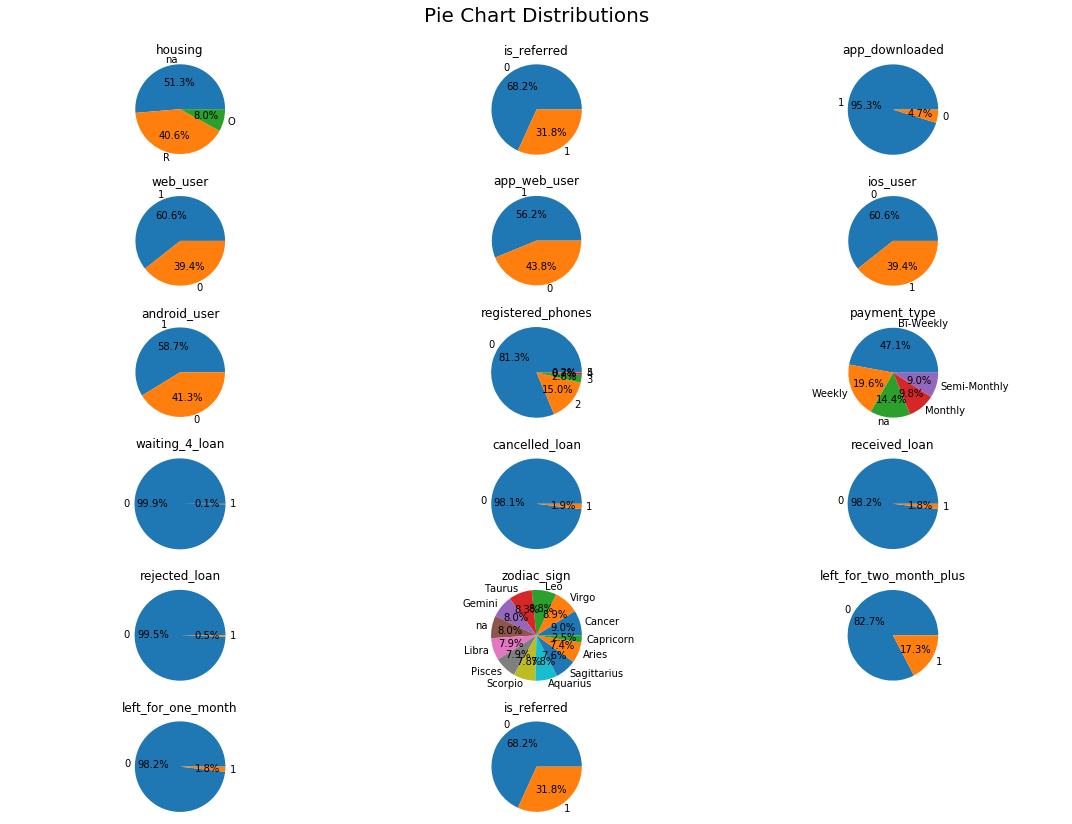

In [18]:
fig = plt.figure(figsize=(15,12))
plt.suptitle('Pie Chart Distributions', fontsize = 20)
for i in range(1,dataset2.shape[1] + 1):
    plt.subplot(6,3,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
    values = dataset2.iloc[:,i-1].value_counts(normalize = True).values
    index  = dataset2.iloc[:,i-1].value_counts(normalize = True).index
    
    plt.pie(values,labels=index, autopct='%1.1f%%')
    plt.axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])



In [19]:
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64